# Breast Cancer prediction machine learning algorithm using logistic regression


The data was obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
Data description can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

Objective 
---------

Predict breast cancer based on a set of cytology features (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nuceloli, mitosis).


Data Preprocessing 
------------------

Missing values with "?" were replaced with "NaN" to make it easy to find and delete rows with missing data.
Labels were added in the first row based on the data description. 
Values in the field classs was replaced as follows 2=0(benign) 4=1 (malignant /cancer).
No other pre-processing was done.
The data file "wisconsin_breast_cancer.csv" is present in this same GitHub folder.


Requirements
------------
 

Python 3.5.

Pandas 0.18.1.

sklearn 0.17.1.

matplotlib 1.5.1.

If you have installed latest anaconda, you will have all the required packages.

-----------------------------------

Tutorial created by: Johnson Thomas. 

Acknowledgement: Kevin Markham, Jason Brownlee and all others who created machine learning tutorials. 


In [2]:
# Importing pandas to read CSV file

In [3]:
import pandas as pd

In [4]:
# Read breast cancer csv file to pandas data frame data
data = pd.read_csv('wisconsin_breast_cancer.csv')

In [5]:
# Display the first 5 rows of the csv file
data.head()

,﻿id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [6]:
data.shape # It is always a good idea to understand your data

(699, 11)

In [7]:
# There are 699 rows and 11 columns in this CSV file

In [8]:
data.isnull().sum() # Find out how many cells have missing values
# Looks like the field nucleoli has 16 missing values 

﻿id           0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

In [9]:
data=data.dropna(how='any') # Dropping any rows that has missing values

In [10]:
# previously we had 699 rows. The above code deleted 16 rows with missing values and now we have 683 rows

In [11]:
#creating feature data set
# Here we are going to select feature fileds and assign it to a pandas data frame x. We do not need Id. So it was dropped
x=data[['thickness','size','shape','adhesion','single','nuclei','chromatin','nucleoli','mitosis']] 

In [12]:
x.head() # printing the first 5 rows to see whether we got all the features 

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [13]:
# Now we are going to extract the 'class' field from 'data' and store it in variable y
# This is the variable that we want to predict 0= no cancer 1 = cancer 
y=data['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Getting ready to do classification

Import cross validation from sklearn for test trian split. Then import logistic regression from sklearn.

The goal is to spilit our data into two. A traning data set and a testing set. We will use the training set to train our logistic regression model. After that, we will use this model to predict cancer occurance from the features in the testing set. Since we already know the occurance of cancer in the testing set we can comapre it with the predicted vaules to benchmark our model.

In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [15]:
# train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred_class=logreg.predict(x_test) # make predictions based on x_test and store it to y_pred_class

In [18]:
# Now let us see how our model is performing. 
# We will start with accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.929824561404


In [19]:
## Not bad at all. 92.9% of the time our model was able to identify breast cancer based on the training data 
# Now let us see how our "intelligent" model compare to a dumb model which predicts "o" or "not cancer" all the time
# because it the most prevelent class

In [20]:
y_test.value_counts() # as you see "0" is more prevalent 

0    107
1     64
Name: class, dtype: int64

In [ ]:
# Now let us see the percentage of "o" in y_test. This will be the accuracy of a dumb model that predicts 0 
# all the time
1-y_test.mean()

In [22]:
# looks like we did better than the dumb model!

# Now let us create a confusion matrix to identify sensitivity specificity & all the other good statistical stuff

In [24]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[103   4]
 [  8  56]]


In [25]:
#  let us see what this means
#
#                Predicted 0    Predicted 1    Total
#                                
#Actual  0        103              4            107
#Actual  1          8             56             64   

#Total            111             60 



In [26]:
confusion =metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [27]:
# Let us see the sensitivity of our logistic regression model
print (TP / float(TP+FN))

0.875


In [28]:
# Our model's sensitivity is 87.5%

In [29]:
# Let us calculate specificity
print (TN / float(TN+FP))

0.96261682243


In [30]:
# Looks like our model has pretty good specificity 96.2%

In [31]:
# Calculate false postive rate - predicting cancer when pt does not have cancer
print (FP/ float(TN+FP))

0.0373831775701


In [32]:
# pretty awesome 3.7%

In [33]:
# precison - when it is predicting cancer how precise is it 
# positive predictive value 
print (TP / float(TP+FP))

0.933333333333


In [34]:
# Negative predictive value
print (TN / float(TN+ FN))

0.927927927928


In [35]:
# Now let us say that you want to figure out the probaility of cancer from a set of features
# we can use the predict_proba function
# let us first see the predicted answers
logreg.predict(x_test)[0:10] # predicting cancer  based on the data from first 10 rows of x

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [36]:
# Now let us predict the probaility of each prediction
logreg.predict_proba(x_test)[0:10, :]

array([[ 0.92925367,  0.07074633],
       [ 0.97810202,  0.02189798],
       [ 0.05497953,  0.94502047],
       [ 0.01971146,  0.98028854],
       [ 0.98442876,  0.01557124],
       [ 0.96262046,  0.03737954],
       [ 0.94219509,  0.05780491],
       [ 0.00202679,  0.99797321],
       [ 0.9598277 ,  0.0401723 ],
       [ 0.98330704,  0.01669296]])

In [37]:
# The first colun is the probability of it being benign. Second column is the probablity of it being cancerous 

# Now let us find out the area under the curve.

"roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve"


In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 
import random 
%matplotlib inline 
# calculates the probability of predicting "1" (cancer) and store the out put in probab_cancer
proba_cancer=logreg.predict_proba(x_test)[:,1]  

In [39]:
# we need the actual values in the cancer column and the predicted probabilities of postive value "1"
roc_auc_score(y_test, proba_cancer)

0.99269859813084116

In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba_cancer)
roc_auc = auc(false_positive_rate, true_positive_rate)

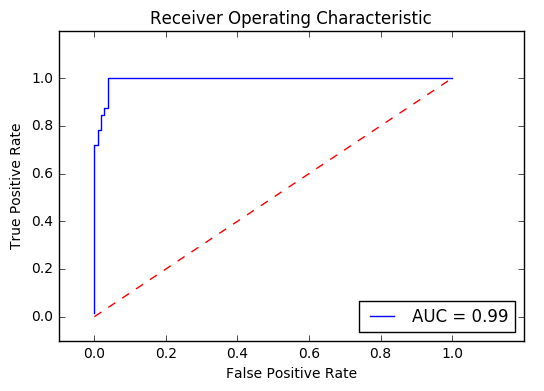

In [41]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()